import os
path = os.path.abspath(os.path.join('..'))
print(path)
import sys

sys.path.insert(0,path)
print(sys.executable)

In [1]:
import os
from dcapy import dca
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# dcapy Basis Examples to try

## Basics Equations

First Section will explore the Arps Declination Analysis equations. 
Starting from Equations used to calculate rate then cumulatives.

The library numpy is used to performed the majority of operations

### Exponential b = 0, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [2]:
time1 = [0,2,3,4,10]
qi1 = 500
di1 = 0.3 
dca.arps_exp_rate(time1,qi1,di1)

array([500.        , 274.40581805, 203.28482987, 150.59710596,
        24.89353418])

Cumulative volume can be calculated  for any timestep

In [3]:
dca.arps_exp_cumulative(time1,qi1,di1)


array([   0.        ,  751.98060651,  989.0505671 , 1164.67631348,
       1583.68821939])

### Hyperbolic 0<b<1, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [4]:
b = 0.5
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 295.85798817, 237.81212842, 195.3125    ,
        80.        ])

In [5]:
dca.arps_hyp_cumulative(time1,qi1,di1,b,ti=0)

array([  -0.        ,  769.23076923, 1034.48275862, 1250.        ,
       2000.        ])

### Armonic, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [6]:
b = 1
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 312.5       , 263.15789474, 227.27272727,
       125.        ])

In [7]:
dca.arps_arm_cumulative(time1,qi1,di1,b,ti=0)

array([   0.        ,  783.33938208, 1069.75647695, 1314.09560061,
       2310.49060187])

## Use arps_forecast and arps_cumulative 
independently of the b. It internally uses the appropiate equation

In [8]:
print('Examples Arps Forecast function')

print('Example 1. Single Values')
time1 = [0,1,2,3,4]
qi1 = 500,
di1 = 0.3
b1 = 0 
f1 = dca.arps_forecast(time1,qi1,di1,b1)
print('Forecast Example 1')
print(f1)


Examples Arps Forecast function
Example 1. Single Values
Forecast Example 1
[500.         370.40911034 274.40581805 203.28482987 150.59710596]
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)


In [9]:
print('Examples Arps Forecast function')

print('Example 1. Single Values')
time1 = [[0,1,2,3,4,5,6,7,8,9,10],[None,None,None,None,None,0,1,2,3,4,5]]
qi1 = 500,
di1 = 0.3
b1 = 0 
f1 = dca.arps_forecast(time1,qi1,di1,b1)
print('Forecast Example 1')
print(f1)

Examples Arps Forecast function
Example 1. Single Values
Forecast Example 1
[[500.                  nan]
 [370.40911034          nan]
 [274.40581805          nan]
 [203.28482987          nan]
 [150.59710596          nan]
 [111.56508007 500.        ]
 [ 82.64944411 370.40911034]
 [ 61.22821413 274.40581805]
 [ 45.35897664 203.28482987]
 [ 33.60275637 150.59710596]
 [ 24.89353418 111.56508007]]


In [10]:
print('Examples Arps Forecast function')

print('Example 1. Single Values')
time1 = [0,1,2,3,4,5,6,7,8,9,10]
qi1 = 500,
di1 = 0.3
b1 = 0 
f1 = dca.arps_forecast(time1,qi1,di1,b1,ti=[0,2])
print('Forecast Example 1')
print(f1)

Examples Arps Forecast function
Example 1. Single Values
Forecast Example 1
[[500.                  nan]
 [370.40911034          nan]
 [274.40581805 500.        ]
 [203.28482987 370.40911034]
 [150.59710596 274.40581805]
 [111.56508007 203.28482987]
 [ 82.64944411 150.59710596]
 [ 61.22821413 111.56508007]
 [ 45.35897664  82.64944411]
 [ 33.60275637  61.22821413]
 [ 24.89353418  45.35897664]]


In [11]:
dca.arps_cumulative(time1,qi1,di1,b1)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


array([   0.        ,  431.9696322 ,  751.98060651,  989.0505671 ,
       1164.67631348, 1294.78306642, 1391.16851963, 1462.57261958,
       1515.47007785, 1554.65747877, 1583.68821939])

In [12]:
print('\nExample 2. Multiple values')
time2 = [0,1,2,3,1]
qi2 = [600,700,900]
di2 = 0.3
b2 = [0,0.5,1]
print(f' ->Time array {time2}\n ->qi {qi2}\n -> di {di2}\n b {b2}')    
f2 = dca.arps_forecast(time2,qi2,di2,b2)
print('Forecast Example 2')
print(f2)
f2.shape


Example 2. Multiple values
 ->Time array [0, 1, 2, 3, 1]
 ->qi [600, 700, 900]
 -> di 0.3
 b [0, 0.5, 1]
Forecast Example 2
[[600.         700.         900.        ]
 [444.49093241 529.30056711 692.30769231]
 [329.28698166 414.20118343 562.5       ]
 [243.94179584 332.93697979 473.68421053]
 [444.49093241 529.30056711 692.30769231]]


(5, 3)

In [13]:
dca.arps_cumulative(time2,qi2,di2,b2)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:100: RuntimeWarning: divide by zero encountered in true_divide
  f = qi/(di*(b-1))
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:103: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


array([[   0.        ,   -0.        ,    0.        ],
       [ 518.36355864,  608.69565217,  787.0927934 ],
       [ 902.37672781, 1076.92307692, 1410.01088774],
       [1186.86068052, 1448.27586207, 1925.56165852],
       [ 518.36355864,  608.69565217,  787.0927934 ]])

In [14]:
dca.arps_forecast([0,1,2,3,4,5],4000,0.3,0)

array([4000.        , 2963.27288273, 2195.24654438, 1626.27863896,
       1204.77684765,  892.52064059])

In [15]:
dca.arps_rate_time([4000,5000],[0.3,0.6],[0,1],1000)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:274: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)


array([4, 6])

# Arps Class

In [16]:
 dca_data = {
    'ti':'2021-01-01',
    'di':0.3,
    'freq_di':'A',
    'qi':800,
    'b':0,
    'bsw':0.9
}
    
dca_ex = dca.Arps(**dca_data)
fr_params = {'start':date(2021,1,1),
    'end':date(2021,6,28),
    'freq_input':'D',
    'freq_output':'M'}


dca_ex.forecast(**fr_params)

,oil_rate,oil_cum,iteration,oil_volume,bsw,water_rate,fluid_rate,wor,water_cum,fluid_cum,water_volume,fluid_volume
date,,,,,,,,,,,,
2021-01,800.000000,0.000000,0,0.000000,0.9,7200.000000,8000.000000,9.0,0.000000e+00,0.000000e+00,0.000000,0.000000
2021-02,779.873928,24486.721159,0,24486.721159,0.9,7018.865350,7798.739278,9.0,2.175848e+05,2.417609e+05,217584.825860,241760.917623
2021-03,762.131092,46073.838672,0,21587.117513,0.9,6859.179824,7621.310915,9.0,4.096419e+05,4.551576e+05,192057.035059,213396.705621
2021-04,742.957710,69401.453077,0,23327.614405,0.9,6686.619388,7429.577098,9.0,6.169271e+05,6.854745e+05,207285.201034,230316.890038
2021-05,724.862217,91417.636508,0,22016.183431,0.9,6523.759949,7248.622166,9.0,8.126399e+05,9.029332e+05,195712.798474,217458.664971
2021-06,706.626430,113604.510228,0,22186.873720,0.9,6359.637870,7066.264299,9.0,1.009789e+06,1.121987e+06,197148.773956,219054.193284


In [17]:
dca.arps_cumulative([0,  31,  59,  90, 120, 151],800,0.3/365,0)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


array([     0.        ,  24486.72115879,  46073.83867164,  69401.45307673,
        91417.63650796, 113604.51022754])

In [18]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = [4000,5000]
di = 0.3
b = 0
ti = 0
di_f = 'A'
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc)

Example Arps Class
Declination 
 Ti: 0 
 Qi: [4000.0, 5000.0] bbl/d 
 Di: 0.3 A 
 b: 0.0


/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
Calculate Daily Basis each day
         oil_rate       oil_cum  iteration   oil_volume
date                                                   
0     4000.000000  0.000000e+00          0     0.000000
1     3996.713679  3.998357e+03          0  3998.356615
2     3993.430059  7.993428e+03          0  3995.071644
3     3990.149136  1.198522e+04          0  3991.789373
4     3986.870909  1.597373e+04          0 

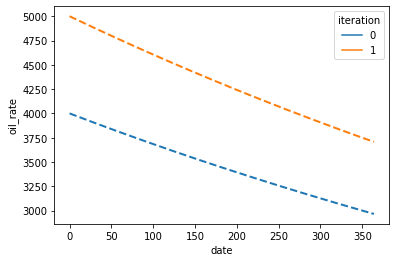

In [19]:
print('Calculate Daily Basis each day')

#print(dc.forecast(start=0,end=1000,freq_input='D',freq_output='D'))

dd = dc.forecast(start=0,end=365,freq_input='D',freq_output='D')
#print(dd[28:31])
print(dd)
#print(dc.forecast(start=0,end=365,freq_input='D',freq_output='D').head(10))
dc.plot(start=0,end=365,freq_input='D',freq_output='D')

Calculate Daily Basis each Month
         oil_rate       oil_cum  iteration     oil_volume
date                                                     
0     4000.000000  0.000000e+00          0       0.000000
30    3902.575918  1.185326e+05          0  118532.633235
60    3807.524699  2.341783e+05          0  115645.649987
90    3714.788549  3.470073e+05          0  112828.982162
120   3624.311083  4.570882e+05          0  110080.917156
150   3536.037288  5.644880e+05          0  107399.784078
180   3449.913491  6.692719e+05          0  104783.952732
210   3365.887327  7.715038e+05          0  102231.832629
240   3283.907706  8.712456e+05          0   99741.872015
270   3203.924783  9.685582e+05          0   97312.556932
300   3125.889925  1.063501e+06          0   94942.410298
330   3049.755686  1.156131e+06          0   92629.991004
360   2975.475774  1.246504e+06          0   90373.893042
0     5000.000000  0.000000e+00          1       0.000000
30    4878.219897  1.481658e+05        

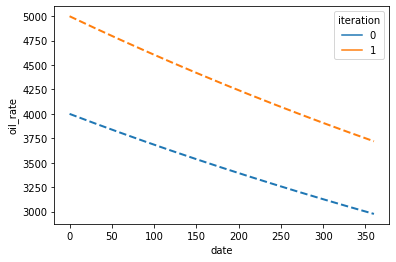

In [20]:
print('Calculate Daily Basis each Month')
print(dc.forecast(start=0,end=365,freq_input='D',freq_output='M'))
dc.plot(start=0,end=365,freq_input='D',freq_output='M',rate_kw={'color':'red'})


Calculate Daily Basis each Year
         oil_rate       oil_cum  iteration    oil_volume
date                                                    
0     4000.000000  0.000000e+00          0  0.000000e+00
365   2963.272883  1.261351e+06          0  1.261351e+06
0     5000.000000  0.000000e+00          1  0.000000e+00
365   3704.091103  1.576689e+06          1  1.576689e+06
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/

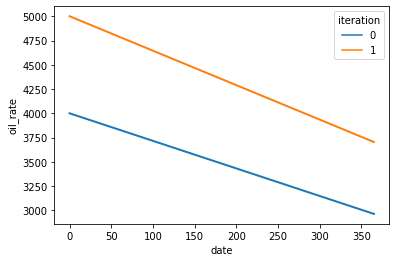

In [21]:
print('Calculate Daily Basis each Year')
print(dc.forecast(start=0,end=366,freq_input='D',freq_output='A'))
dc.plot(start=0,end=366,freq_input='D',freq_output='A',rate_kw=dict(color='blue',linestyle='-',linewidth=2))

Calculate Monthly Basis each Month
         oil_rate       oil_cum  iteration     oil_volume
date                                                     
0     4000.000000  0.000000e+00          0       0.000000
1     3901.239648  1.185124e+05          0  118512.422264
2     3804.917698  2.340988e+05          0  115586.340133
3     3710.973945  3.468313e+05          0  112732.503226
4     3619.349672  4.567804e+05          0  109949.127804
5     3529.987610  5.640149e+05          0  107234.474167
6     3442.831906  6.686017e+05          0  104586.845566
7     3357.828083  7.706063e+05          0  102004.587148
8     3274.923012  8.700924e+05          0   99486.084918
9     3194.064875  9.671221e+05          0   97029.764729
10    3115.203132  1.061756e+06          0   94634.091302
11    3038.288493  1.154054e+06          0   92297.567263
12    2963.272883  1.244073e+06          0   90018.732208
0     5000.000000  0.000000e+00          1       0.000000
1     4876.549560  1.481405e+05      

Text(0, 0.5, 'Rate [bbl/d]')

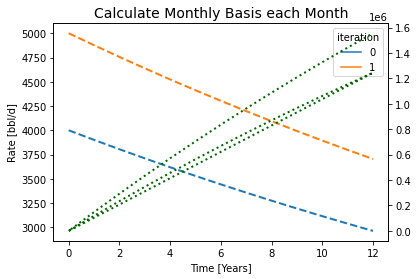

In [22]:
print('Calculate Monthly Basis each Month')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='M'))

fig, ax = plt.subplots()
dc.plot(start=0,end=13,freq_input='M',freq_output='M',cum=True,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Time [Years]')
ax.set_ylabel('Rate [bbl/d]')

In [23]:
print('Calculate Monthly Basis each Year')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='A'))

Calculate Monthly Basis each Year
         oil_rate       oil_cum  iteration    oil_volume
date                                                    
0     4000.000000  0.000000e+00          0  0.000000e+00
12    2963.272883  1.244073e+06          0  1.244073e+06
0     5000.000000  0.000000e+00          1  0.000000e+00
12    3704.091103  1.555091e+06          1  1.555091e+06
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


In [24]:
print('Calculate Year Basis each Year')
print(dc.forecast(start=0,end=2,freq_input='A',freq_output='A'))

Calculate Year Basis each Year
         oil_rate       oil_cum  iteration    oil_volume
date                                                    
0     4000.000000  0.000000e+00          0  0.000000e+00
1     2963.272883  1.261351e+06          0  1.261351e+06
0     5000.000000  0.000000e+00          1  0.000000e+00
1     3704.091103  1.576689e+06          1  1.576689e+06
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


In [25]:
print('Calculate Year Basis each Year - Rate Limit')
print(dc.forecast(start=0,end=15,freq_input='A',freq_output='A',rate_limit=100))


Calculate Year Basis each Year - Rate Limit
         oil_rate       oil_cum  iteration    oil_volume
date                                                    
0     4000.000000  0.000000e+00          0  0.000000e+00
1     2963.272883  1.261351e+06          0  1.261351e+06
2     2195.246544  2.195783e+06          0  9.344320e+05
3     1626.278639  2.888028e+06          0  6.922443e+05
4     1204.776848  3.400855e+06          0  5.128272e+05
5      892.520641  3.780767e+06          0  3.799117e+05
6      661.195553  4.062212e+06          0  2.814455e+05
7      489.825713  4.270712e+06          0  2.085000e+05
8      362.871813  4.425173e+06          0  1.544606e+05
9      268.822051  4.539600e+06          0  1.144272e+05
10     199.148273  4.624370e+06          0  8.476976e+04
11     147.532670  4.687169e+06          0  6.279898e+04
12     109.294890  4.733691e+06          0  4.652263e+04
0     5000.000000  0.000000e+00          1  0.000000e+00
1     3704.091103  1.576689e+06          1  

In [26]:
inn =np.tile(np.arange(0,15),(2,1)) > 7
g=np.tile(np.arange(0,15),(2,1))
g[inn] = 100
g


array([[  0,   1,   2,   3,   4,   5,   6,   7, 100, 100, 100, 100, 100,
        100, 100],
       [  0,   1,   2,   3,   4,   5,   6,   7, 100, 100, 100, 100, 100,
        100, 100]])

In [27]:
# Custom time list
print(dc.forecast(time_list=np.array([0,5,10,18]),freq_input='M'))

         oil_rate       oil_cum  iteration     oil_volume
date                                                     
0     4000.000000  0.000000e+00          0       0.000000
5     3529.987610  5.640149e+05          0  564014.867594
10    3115.203132  1.061756e+06          0  497741.373663
18    2550.512606  1.739385e+06          0  677628.630958
0     5000.000000  0.000000e+00          1       0.000000
5     4412.484513  7.050186e+05          1  705018.584492
10    3894.003915  1.327195e+06          1  622176.717079
18    3188.140758  2.174231e+06          1  847035.788698
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power

In [28]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
fluid_rate = 1000
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=0, end=6, freq_input='M', freq_output='M'))

Example Arps Class estimate water rate  - Fluid Rate
        oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                  
0     400.000000      0.000000          0      0.000000      1000.0   
1     390.123965  11851.242226          0  11851.242226      1000.0   
2     380.491770  23409.876240          0  11558.634013      1000.0   
3     371.097395  34683.126562          0  11273.250323      1000.0   
4     361.934967  45678.039343          0  10994.912780      1000.0   
5     352.998761  56401.486759          0  10723.447417      1000.0   
0     500.000000      0.000000          1      0.000000      1000.0   
1     487.654956  14814.052783          1  14814.052783      1000.0   
2     475.614712  29262.345300          1  14448.292517      1000.0   
3     463.871743  43353.908203          1  14091.562903      1000.0   
4     452.418709  57097.549178          1  13743.640976      1000.0   
5     441.248451  70501.

In [29]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))  

Example Arps Class estimate water rate  - Fluid Rate
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
           oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                     
2021-02  400.000000      0.000000          0      0.000000      1000.0   
2021-03  390.899639  11072.106269          0  11072.106269      1200.0   
2021-04  381.065546  23036.919336          0  11964.813067      1300.0   
2021-05  371.784305  34329.094979          0  11292.175643      1200.0   
2021-06  362.431108  45708.818254          0  11379.723275     

Example Arps Class estimate water rate  - Fluid Rate
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
           oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                     
2021-02  400.000000      0.000000          0      0.000000      1000.0   
2021-03  390.899639  11072.106269          0  11072.106269      1200.0   
2021-04  381.065546  23036.919336          0  11964.813067      1300.0   
2021-05  371.784305  34329.094979          0  11292.175643      1200.0   
2021-06  362.431108  45708.818254          0  11379.723275     

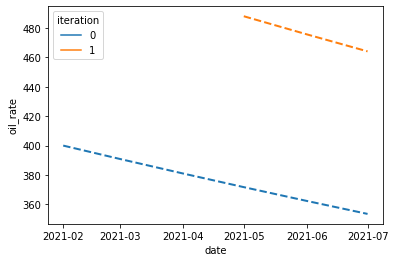

In [30]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = [date(2021,2,1), date(2021,4,1)]
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))  
print(dc.plot(start=date(2021,2,1), end=date(2021,7,1), freq_output='M')) 

numpy.datetime64('2021-02-01')

In [31]:
print('Example Arps Class estimate water rate  - bsw')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
bsw = [0.1000,0.1200,0.1300,0.1200,0.1300,0.1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, bsw=bsw)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M')) 

Example Arps Class estimate water rate  - bsw
           oil_rate       oil_cum  iteration    oil_volume   bsw  water_rate  \
date                                                                           
2021-02  400.000000      0.000000          0      0.000000  0.10   44.444444   
2021-03  390.899639  11072.106269          0  11072.106269  0.12   53.304496   
2021-04  381.065546  23036.919336          0  11964.813067  0.13   56.940829   
2021-05  371.784305  34329.094979          0  11292.175643  0.12   50.697860   
2021-06  362.431108  45708.818254          0  11379.723275  0.13   54.156373   
2021-07  353.603729  56448.796662          0  10739.978408  0.12   48.218690   
2021-02  500.000000      0.000000          1      0.000000  0.10   55.555556   
2021-03  488.624548  13840.132836          1  13840.132836  0.12   66.630620   
2021-04  476.331932  28796.149170          1  14956.016334  0.13   71.176036   
2021-05  464.730382  42911.368724          1  14115.219554  0.12   63.3723

In [32]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
bsw = 0.5
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, bsw=fluid_rate)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
        oil_rate      oil_cum  iteration  oil_volume     bsw  water_rate  \
date                                                                       
0     400.000000     0.000000          0    0.000000  1000.0 -400.400400   
1     399.671368   399.835661          0  399.835661  1200.0 -400.004705   
2     399.343006   799.342826          0  399.507164  1300.0 -399.650429   
3     399.014914  1198.521763          0  399.178937  1200.0 -399.347703   
4     398.687091  1597.372743          0  398.850980  1300.0 -398.994009   
5     398.359538  1995.896035          0  398.523292  1200.0 -398.691781   
0     500.000000     0.000000          1    0.000000  1000.0 -500.500501   
1     499.589210   499.794577          1  499.794577  1200.0 -500.005882   
2     499.178757   999.178532          1  499.383956  1300.0 -499.563037   
3     498.768642  1498.152204          1  498.973672  1200.0 -499.184629   
4     498.358864  1996.715929      

In [33]:
print('Example Arps Class estimate water rate  - bsw')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = date(2021,2,1)
di_f = 'A'
wor = 2
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))

Example Arps Class estimate water rate  - bsw
           oil_rate       oil_cum  iteration    oil_volume  wor       bsw  \
date                                                                        
2021-02  400.000000      0.000000          0      0.000000  2.0  0.666667   
2021-03  390.899639  11072.106269          0  11072.106269  2.0  0.666667   
2021-04  381.065546  23036.919336          0  11964.813067  2.0  0.666667   
2021-05  371.784305  34329.094979          0  11292.175643  2.0  0.666667   
2021-06  362.431108  45708.818254          0  11379.723275  2.0  0.666667   
2021-07  353.603729  56448.796662          0  10739.978408  2.0  0.666667   
2021-02  500.000000      0.000000          1      0.000000  2.0  0.666667   
2021-03  488.624548  13840.132836          1  13840.132836  2.0  0.666667   
2021-04  476.331932  28796.149170          1  14956.016334  2.0  0.666667   
2021-05  464.730382  42911.368724          1  14115.219554  2.0  0.666667   
2021-06  453.038885  57136.022

In [34]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
wor = [10,11,12,13,14,15]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
        oil_rate      oil_cum  iteration  oil_volume   wor       bsw  \
date                                                                   
0     400.000000     0.000000          0    0.000000  10.0  0.909091   
1     399.671368   399.835661          0  399.835661  11.0  0.916667   
2     399.343006   799.342826          0  399.507164  12.0  0.923077   
3     399.014914  1198.521763          0  399.178937  13.0  0.928571   
4     398.687091  1597.372743          0  398.850980  14.0  0.933333   
5  

In [35]:
print('Example Arps Class estimate water rate  - Fluid Rate')
#print(dca.time_converter_matrix)
qi = [400,500]
di = 0.3
b = 0
ti = 0
di_f = 'A'
wor = [10,11,12,13,14,15]
glr = 0.5
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, wor=wor, glr=glr)
print(dc.forecast(start=0, end=6, freq_input='D',freq_output='D')) 

Example Arps Class estimate water rate  - Fluid Rate
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
        oil_rate      oil_cum  iteration  oil_volume   wor       bsw  \
date                                                                   
0     400.000000     0.000000          0    0.000000  10.0  0.909091   
1     399.671368   399.835661          0  399.835661  11.0  0.916667   
2     399.343006   799.342826          0  399.507164  12.0  0.923077   
3     399.014914  1198.521763          0  399.178937  13.0  0.928571   
4     398.687091  1597.372743          0  398.850980  14.0  0.933333   
5  

## Using Arps with dates

In [36]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = 5000
di = 0.3
b = 0
ti = date(2021,1,1)
di_f = 'A'
dc1 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc1)

Example Arps Class
Declination 
 Ti: 2021-01-01 
 Qi: 5000.0 bbl/d 
 Di: 0.3 A 
 b: 0.0


/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


Text(0, 0.5, 'Rate [bbl/d]')

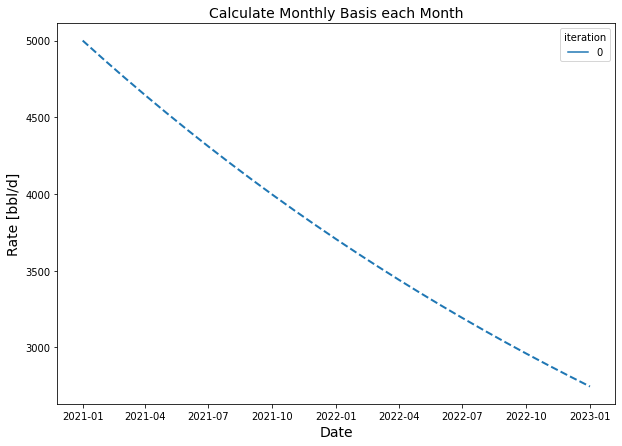

In [37]:
from_time = date(2021,1,1)
to_time = date(2023,1,1)



fig, ax = plt.subplots(figsize=(10,7))
dc1.plot(start=from_time,end=to_time,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Rate [bbl/d]',fontsize=14)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


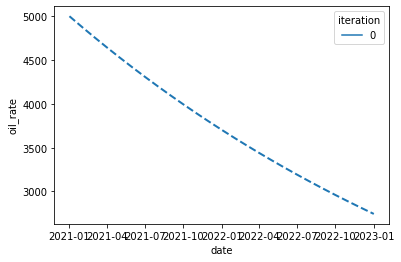

In [38]:
dc1.plot(start=from_time,end=to_time,freq_output='M')

In [39]:
dc1.forecast(start=from_time,end=to_time,freq_output='M')

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
2021-01,5000.000000,0.000000e+00,0,0.000000
2021-02,4874.212049,1.530420e+05,0,153042.007242
2021-03,4763.319322,2.879615e+05,0,134919.484455
2021-04,4643.485686,4.337591e+05,0,145797.590032
2021-05,4530.388854,5.713602e+05,0,137601.146445
2021-06,4416.415187,7.100282e+05,0,138667.960747
2021-07,4308.848888,8.409005e+05,0,130872.330399
2021-08,4200.448634,9.727875e+05,0,131886.976552
2021-09,4094.775468,1.101357e+06,0,128569.018039


In [40]:
dc1.forecast(start=from_time,end=to_time,freq_output='A')

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
2021,5000.000000,0.000000e+00,0,0.000000e+00
2022,3704.091103,1.576689e+06,0,1.576689e+06
2023,2744.058180,2.744729e+06,0,1.168040e+06


In [41]:
dca.time_converter_matrix

to,A,D,M
from,,,
A,1.0,0.002740,0.083333
D,365.0,1.000000,30.000000
M,12.0,0.033333,1.000000


In [42]:
times = np.array([date(2021,1,1), date(2021,2,5), date(2021,6,17),date(2098,8,21)], dtype='datetime64')
print(times)
dc1.forecast(time_list=times)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
['2021-01-01' '2021-02-05' '2021-06-17' '2098-08-21']


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
2021-01,5.000000e+03,0.000000e+00,0,0.000000e+00
2021-02,4.874212e+03,1.530420e+05,0,1.530420e+05
2021-06,4.416415e+03,7.100282e+05,0,5.569862e+05
2098-08,3.839821e-07,6.083333e+06,0,5.373305e+06


In [43]:
print('Example Arps Class with probabilistic methods')
#print(dca.time_converter_matrix)
qi = {'dist':'norm','kw':{'loc':5000,'scale':500}}
#qi = stats.norm(loc=5000,scale=500)
di = 0.3
b = 0
ti = date(2021,1,1)
di_f = 'A'
dc2 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc2)

Example Arps Class with probabilistic methods
Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 5000, 'scale': 500} bbl/d 
 Di: 0.3 A 
 b: 0.0


In [44]:
dc2.forecast(start=date(2021,1,1), end=date(2022,1,1), iter=2, rate_limit=4200)

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:274: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume
date,,,,
2021-01,5201.178331,0.000000e+00,1,0.000000
2021-02,5070.329218,1.591998e+05,1,159199.754371
2021-03,4954.974648,2.995478e+05,1,140348.059805
2021-04,4830.319427,4.512117e+05,1,151663.853207
2021-05,4712.672068,5.943493e+05,1,143137.620252
2021-06,4594.112595,7.385966e+05,1,144247.358538
2021-07,4482.218294,8.747347e+05,1,136138.065809
2021-08,4369.456483,1.011928e+06,1,137193.536926
2021-09,4259.531487,1.145670e+06,1,133742.078141


/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:274: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


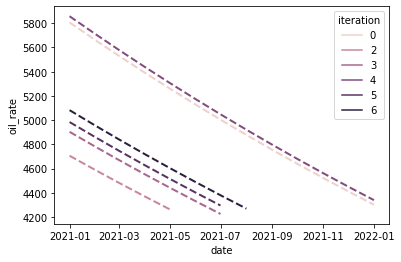

In [45]:
dc2.plot(start=date(2021,1,1), end=date(2022,1,1), iter=8, rate_limit=4200)

In [46]:
print('Example Arps Class with probabilistic methods')
#print(dca.time_converter_matrix)
qi = 1000
di = 0.6
b = {'dist':'uniform','kw':{'loc':0,'scale':1}}
#b = stats.uniform(loc=0,scale=1)
ti = date(2021,1,1)
di_f = 'A'
dc3 = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f)
print(dc3)

Example Arps Class with probabilistic methods
Declination 
 Ti: 2021-01-01 
 Qi: 1000.0 bbl/d 
 Di: 0.6 A 
 b: dist='uniform' kw={'loc': 0, 'scale': 1}


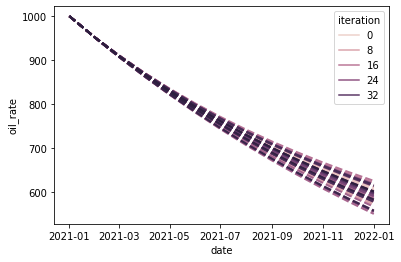

In [47]:
dc3.plot(start=date(2021,1,1), end=date(2022,1,1), iter=40)

In [48]:
dc3.dict()

{'qi': 1000.0,
 'di': 0.6,
 'b': {'dist': 'uniform', 'kw': {'loc': 0, 'scale': 1}},
 'ti': datetime.date(2021, 1, 1),
 'freq_di': <FreqEnum.A: 'A'>,
 'seed': None,
 'fluid_rate': None,
 'bsw': None,
 'wor': None,
 'gor': None,
 'glr': None}